In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Для примера возьмём значения мощности автомобилей - x(в л.с.) и их цену - y (в 10 тыс.) для 10-и наблюдений

In [26]:
n = 10

x = np.array([81, 91, 85, 114, 84, 83, 92, 81, 107, 120], dtype = np.float64)
y = np.array([152, 160, 154, 172, 141, 152, 142, 154, 163, 180], dtype = np.float64)


In [17]:
# находим коэффициенты регрессии a и b
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
b


0.7077360876897019

In [18]:
a = np.mean(y) - b * np.mean(x)
a

90.61435497470596

In [20]:
# уравнение регрессии имеет вид y = 0.71x + 90.6
# С увеличением мощности на 1лс, стоимость увеличивается на 70тыс. р

# теперь найдём коэфициент корреляции
r = b * np.std(x) / np.std(y)
r

0.8397088506341199

In [22]:
# коэфициент корреляции r > 0.5 => наблюдается сильная линейная зависимость. 
# коэфициент детерминации R2
R2 = r**2
R2

0.7051109538332747

In [24]:
# 71% вариации цены на машину объясняется вариацией фактора х - количеством л.с.
# с помощью уравнения регрессии посчитаем значения цен на авто, предсказанные моделью
y_pred = a + b * x
y_pred

array([147.94097808, 155.01833895, 150.77192243, 171.29626897,
       150.06418634, 149.35645025, 155.72607504, 147.94097808,
       166.34211636, 175.5426855 ])

In [25]:
# найдём качество модели с помощью средней ошибки аппрокимации А
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

3.458426976076435

In [27]:
# A = 3.5% , что не превышает 8-10%, модель хорошо описывает эмпирические данные.
# Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера.
# Фактическое значение F:
F_fact = ((r**2)/ (n - 2)) / (1 - r**2)
F_fact

0.2988882441544713

In [ ]:
# При 5% уровне значимости и степенях свободы k1 = 1 и k2 = 10-2 = 8 табличное значение
# критерия F = 5,32
# Уравнение регрессии статистически незначимо. 

In [29]:
# Для оценки статистической значимости параметров регрессии используем t-статистику Стьюдента
# и рассчитаем доверительные интервалы каждого их показателей. При df = 8 и альфа = 0.05
# t_kp = 2,306
# Опреелим стандартную ошибку: 
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum( x**2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))
print(f's_residual= {s_residual}\nm_a = {m_a} \nm_b = {m_b}')

s_residual= 7.049028605353316
m_a = 15.341340206804288 
m_b = 0.1618180402190359


In [30]:
# m_a > t , m_b < t  показатель а является значимым. Расчитаем доверительные интервалы
t_cr = 2.306
delta_a = t_cr * m_a
delta_a


35.37713051689069

In [33]:
gamma_a_min = a - delta_a
gamma_a_max = a + delta_a
print(f'[{gamma_a_min}, {gamma_a_max}]')

[55.23722445781527, 125.99148549159665]


In [37]:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')
df

,x,y,y_pred
0,81.0,152.0,147.940978
7,81.0,154.0,147.940978
5,83.0,152.0,149.356450
4,84.0,141.0,150.064186
2,85.0,154.0,150.771922
1,91.0,160.0,155.018339
6,92.0,142.0,155.726075
8,107.0,163.0,166.342116
3,114.0,172.0,171.296269
9,120.0,180.0,175.542685


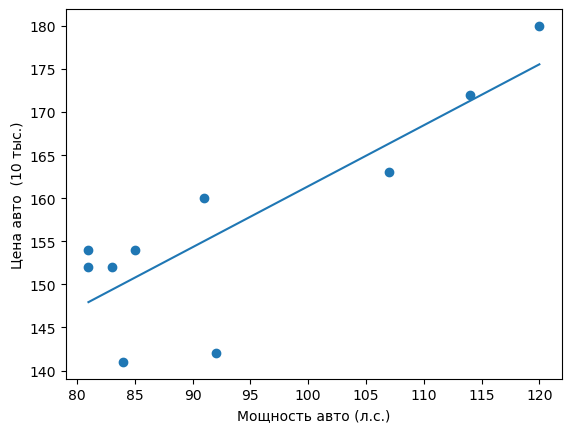

In [39]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Мощность авто (л.с.)')
plt.ylabel('Цена авто  (10 тыс.)')
plt.show()